# Proyect Spaceship Titanic

## Data Base: https://www.kaggle.com/competitions/spaceship-titanic/overview
## Descriptions:
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## Inspect Data:

## Inspect Data

## Inspect Data:

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay
import missingno
import seaborn as sns

importer des pandas en tant que pd
importer numpy en tant que np
de matplotlib importer pyplot en tant que plt
à partir de l'affichage d'importation IPython.display
de sklearn.metrics importer ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay
importation manquantenon
importer seaborn en tant que sns

In [4]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train_df.shape, test_df.shape

((8693, 14), (4277, 13))

In [7]:
display(train_df.isna().sum(), test_df.isna().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

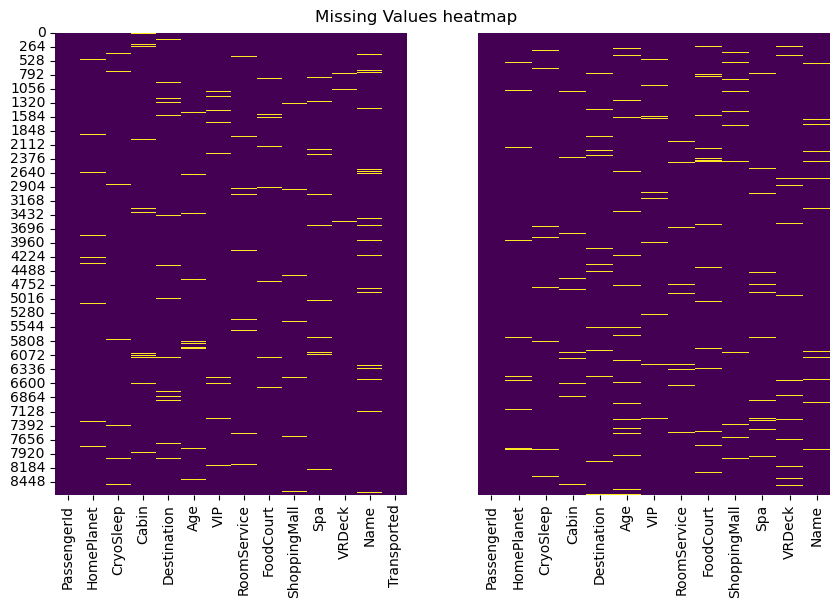

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
ax1 = sns.heatmap(ax=axes[0], data=train_df.isnull(), cbar=False, cmap='viridis')
ax2 = sns.heatmap(ax=axes[1], data=test_df.isnull(), cbar=False, cmap='viridis')
ax2.set(yticks=[])
plt.text(x=-6 ,y=-100 ,s='Missing Values heatmap', fontsize=12)
plt.show()

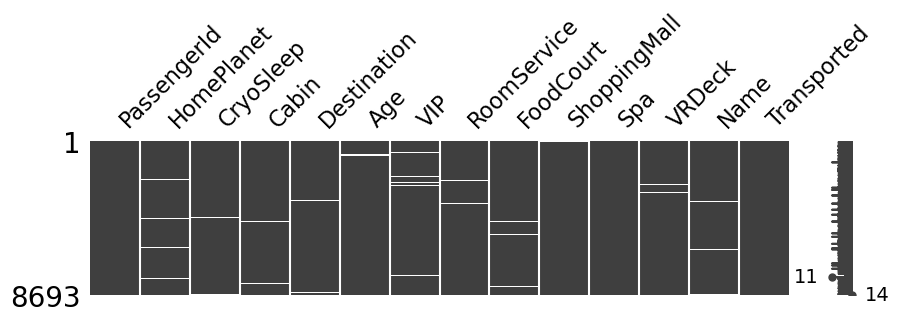

In [9]:
missingno.matrix(train_df, figsize=(10,2));

In [10]:
train_df['CryoSleep'] = train_df['CryoSleep'].replace({True: 1, False: 0})
train_df['VIP'] = train_df['VIP'].replace({True: 1, False: 0})
train_df['Transported'] = train_df['Transported'].replace({True: 1, False: 0})

### We can see that in the spent money features, there is a separation between low and high prices 
* So let's inspect RoomService, FoodCourt, ShoppingMall, Spa and VRDeck

In [11]:
display('Train'.center(80), train_df.describe().T.style.background_gradient(cmap = "magma"),
        'test'.center(80), test_df.describe().T.style.background_gradient(cmap = "Blues"))

'                                     Train                                      '

,count,mean,std,min,25%,50%,75%,max
CryoSleep,8476.000000,0.358306,0.479531,0.000000,0.000000,0.000000,1.000000,1.000000
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000
VIP,8490.000000,0.023439,0.151303,0.000000,0.000000,0.000000,0.000000,1.000000
RoomService,8512.000000,224.687617,666.717663,0.000000,0.000000,0.000000,47.000000,14327.000000
FoodCourt,8510.000000,458.077203,1611.489240,0.000000,0.000000,0.000000,76.000000,29813.000000
ShoppingMall,8485.000000,173.729169,604.696458,0.000000,0.000000,0.000000,27.000000,23492.000000
Spa,8510.000000,311.138778,1136.705535,0.000000,0.000000,0.000000,59.000000,22408.000000
VRDeck,8505.000000,304.854791,1145.717189,0.000000,0.000000,0.000000,46.000000,24133.000000
Transported,8693.000000,0.503624,0.500016,0.000000,0.000000,1.000000,1.000000,1.000000


'                                      test                                      '

,count,mean,std,min,25%,50%,75%,max
Age,4186.000000,28.658146,14.179072,0.000000,19.000000,26.000000,37.000000,79.000000
RoomService,4195.000000,219.266269,607.011289,0.000000,0.000000,0.000000,53.000000,11567.000000
FoodCourt,4171.000000,439.484296,1527.663045,0.000000,0.000000,0.000000,78.000000,25273.000000
ShoppingMall,4179.000000,177.295525,560.821123,0.000000,0.000000,0.000000,33.000000,8292.000000
Spa,4176.000000,303.052443,1117.186015,0.000000,0.000000,0.000000,50.000000,19844.000000
VRDeck,4197.000000,310.710031,1246.994742,0.000000,0.000000,0.000000,36.000000,22272.000000


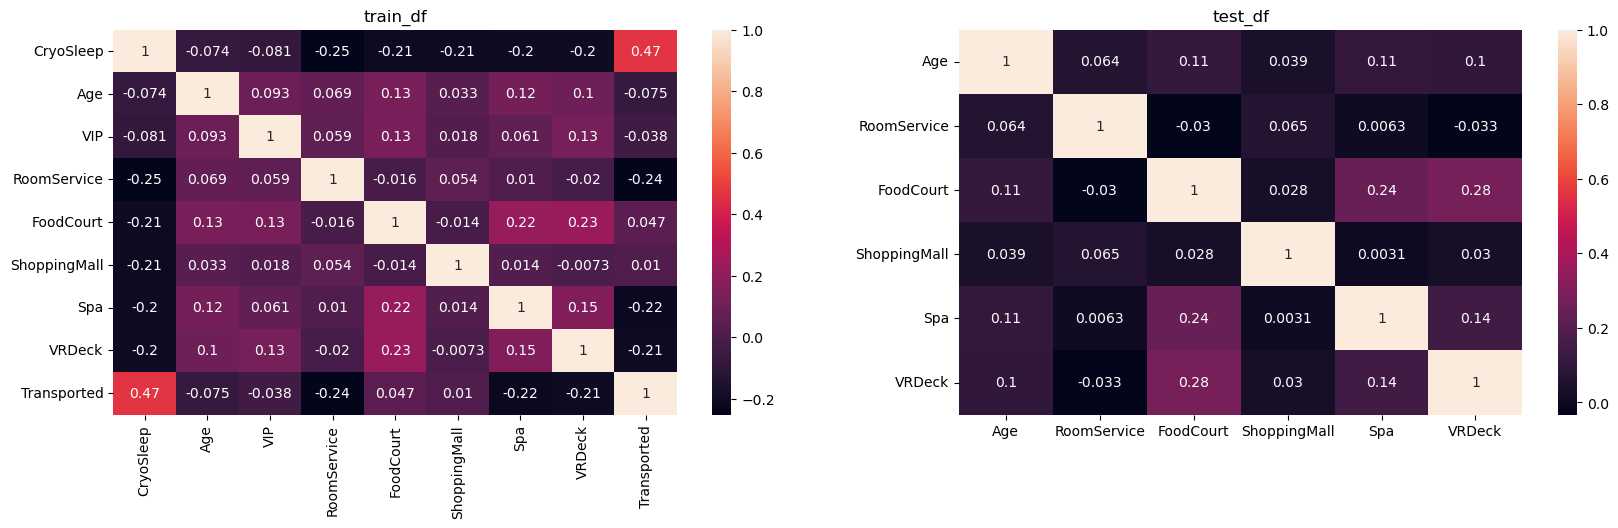

In [12]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
train_cm = train_df.corr(numeric_only=True) 
ax1 = sns.heatmap(ax=axes[0], data=train_cm, annot=True)
ax1.set(title='train_df')

test_cm = test_df.corr(numeric_only=True)
ax2 = sns.heatmap(ax=axes[1], data=test_cm, annot=True)
ax2.set(title='test_df')

plt.show()

### We can see the exist a correlation between the Transported and (VRDeck, Spa, RoomService)
* Let's explore this features

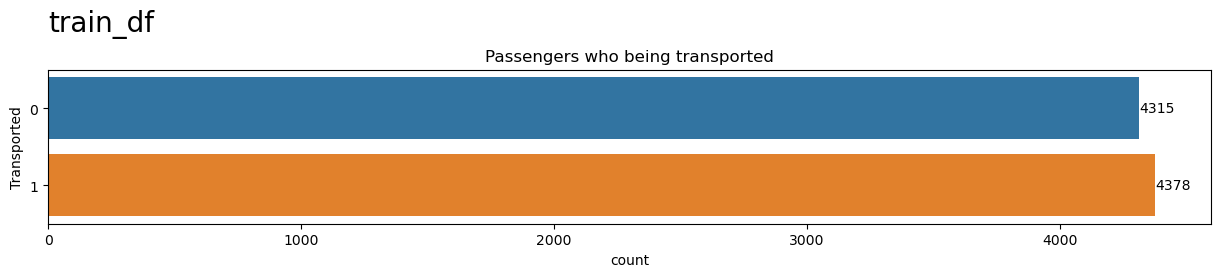

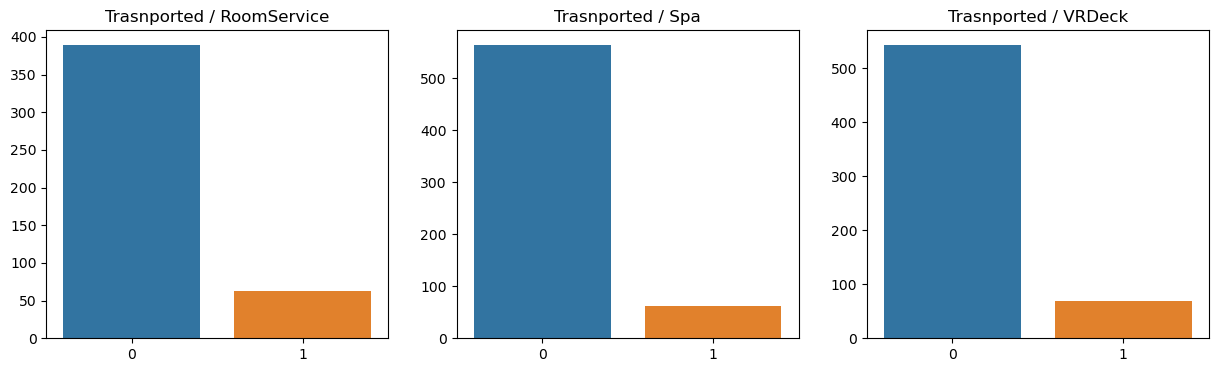

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 2))
counts_trans = train_df['Transported'].value_counts().rename_axis('Transported').reset_index(name='count')
ax1 = sns.barplot(ax=axes, data=counts_trans, x='count', y='Transported', orient='h')
ax1.bar_label(container=ax1.containers[0])
ax1.set_title('Passengers who being transported')

plt.text(x=0, y=-1, s="train_df", fontsize=20, color='black')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
labels = ['RoomService', 'Spa', 'VRDeck']
for i in range(len(labels)):
    ax = sns.barplot(ax=axes[i], data=train_df, x='Transported', y=labels[i], errorbar=None)
    ax.set(title=f'Trasnported / {labels[i]}', ylabel='', xlabel='')
plt.show();

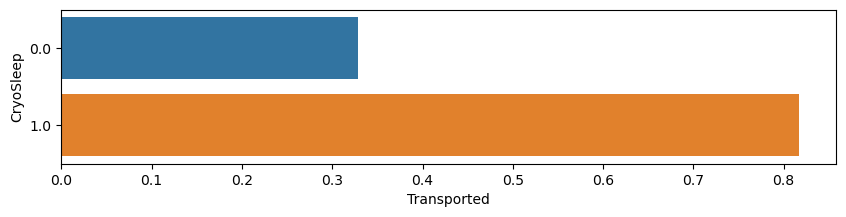

Total CryoSleep: 3037
CryoSleep and Transported: 2483 - 81.76%


In [14]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,2))
ax = sns.barplot(data=train_df, x='Transported', y='CryoSleep', orient='h', errorbar=None)
plt.show()
count = 0
for n in range(len(train_df)):
    if train_df.iloc[n]['CryoSleep'] == 1 and train_df.iloc[n]['Transported'] == 1:
        count += 1

cryo_tran_percent = count * 100 / train_df['CryoSleep'].where(train_df['CryoSleep']== 1).count()        
print(f"Total CryoSleep: {train_df['CryoSleep'].where(train_df['CryoSleep'] == 1).count()}")
print(f"CryoSleep and Transported: {count} - {cryo_tran_percent:.2f}%")

### Where CryoSleep == True there are a lot of possibilities of being Transported

In [15]:
# For count the groups size ej.: 0003_04 -> group 3 , group_size 4
train_df[["Group", "Group_Size"]] = train_df["PassengerId"].str.split('_', expand=True)
train_df["Group_Size"] = train_df["Group"].map(lambda x: train_df["Group"].value_counts(ascending=True)[x])

test_df[["Group", "Group_Size"]] = test_df["PassengerId"].str.split('_', expand=True)
test_df["Group_Size"] = test_df["Group"].map(lambda x: test_df["Group"].value_counts(ascending=True)[x])

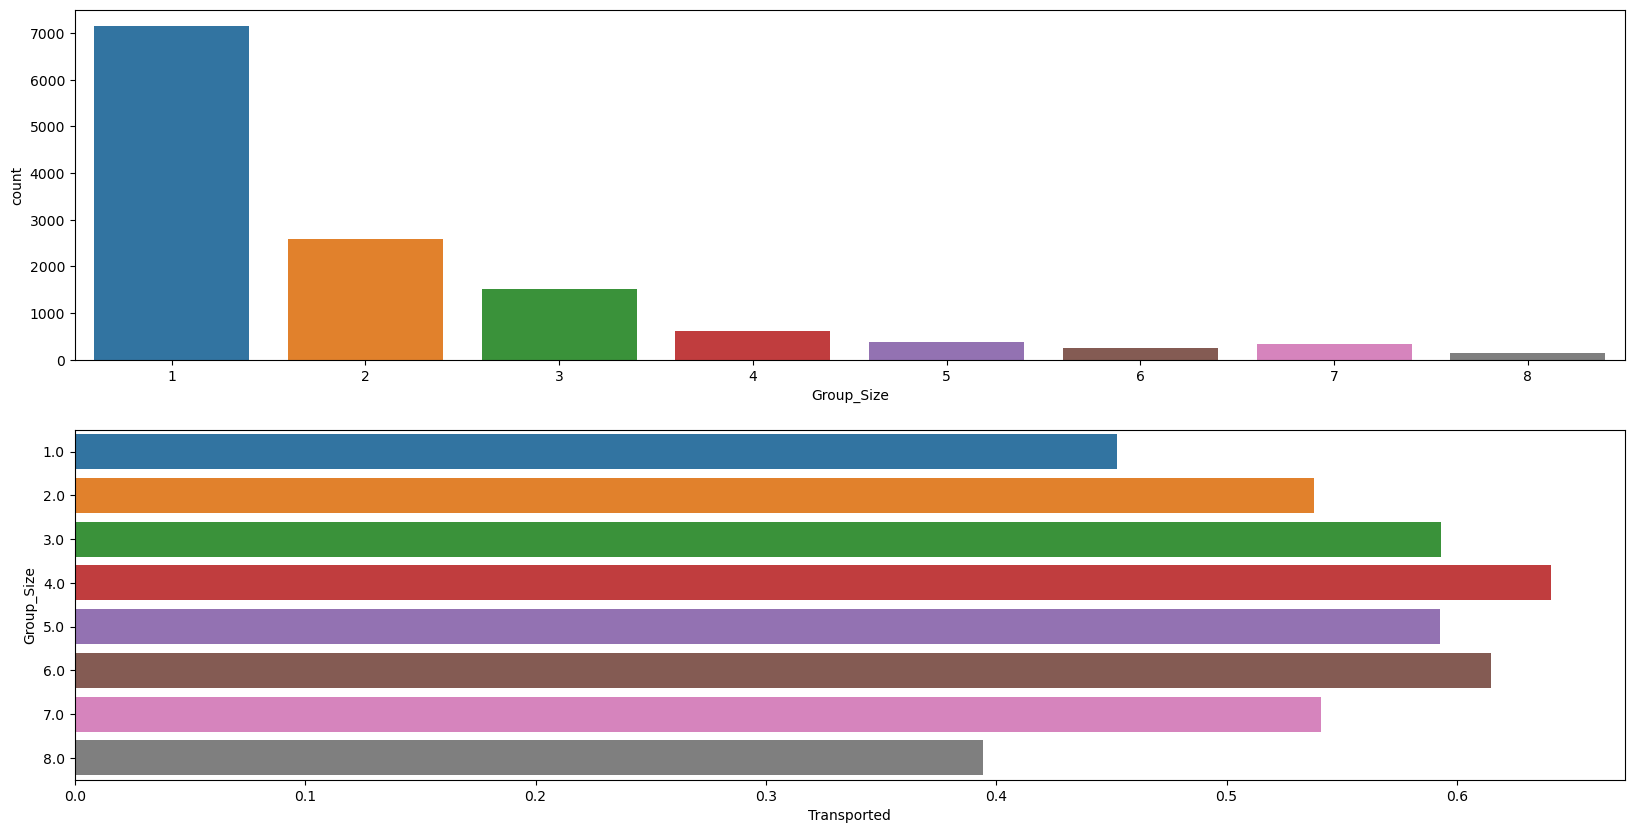

In [16]:
temp_df = train_df[['Group_Size', 'Transported']].groupby(train_df['Group_Size']).agg('mean').sort_values('Transported').reset_index(drop=True)
concat_df = pd.concat([train_df, test_df])
counts_group_size = concat_df['Group_Size'].value_counts().rename_axis('Group_Size').reset_index(name='count')

fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(20, 10))
ax1 = sns.barplot(ax=axes[0], orient='v', data=counts_group_size, x='Group_Size', y='count')
ax2 = sns.barplot(ax=axes[1], orient='h', data=temp_df, x='Transported', y='Group_Size')


### We can see that the group 1 are the biggest but less than 50% of the group are transported

## Now let's explore the Homeplanet and Destination

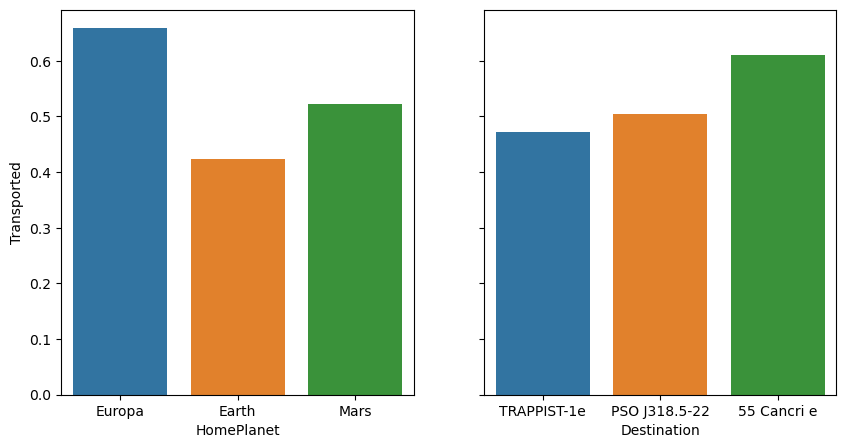

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)
ax1 = sns.barplot(ax=axes[0], data=train_df, y='Transported', x='HomePlanet', orient='v', errorbar=None)
ax2 = sns.barplot(ax=axes[1], data=train_df, y='Transported', x='Destination', orient='v', errorbar=None)
ax2.set(ylabel='')
plt.show()

### From Europa and destination to 55 Cancri passengers have more chances to being Transported
* Let's see the numbers from both

In [18]:
def compare_columns(title, col, col_val, col_to_com, col_to_com_val):
    col_total = col.count()
    col_val_total = col.where(col == col_val).count()
    count = 0
    for n in range(len(col)):
        if col.iloc[n] == col_val and col_to_com.iloc[n] == col_to_com_val:
            count += 1
    percent_col_val = count * 100 / col_val_total
    percent_col = count * 100 / col_total
    print(f'\033[1m{title}\033[0m\n')
    print(f'{col.name} Total -> {col_total}')
    print(f'{col_val} Total -> {col_val_total}')
    print(f'{col.name} = {col_val} and {col_to_com.name} = {col_to_com_val}:')
    print(f'\t* Total: {count} ')
    print(f'\t* {col_val} percent: {percent_col_val:.2f}%')
    print(f'\t* {col.name} percent: {percent_col:.2f}%')

In [19]:
train_df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [20]:
compare_columns('Passenger from Europa and Transported',
                train_df['HomePlanet'], 'Europa',
                train_df['Transported'], 1)

compare_columns('Passenger destination 55 Cancri e and Transported',
                train_df['Destination'], '55 Cancri e',
                train_df['Transported'], 1)

Passenger from Europa and Transported

HomePlanet Total -> 8492
Europa Total -> 2131
HomePlanet = Europa and Transported = 1:
	* Total: 1404 
	* Europa percent: 65.88%
	* HomePlanet percent: 16.53%
Passenger destination 55 Cancri e and Transported

Destination Total -> 8511
55 Cancri e Total -> 1800
Destination = 55 Cancri e and Transported = 1:
	* Total: 1098 
	* 55 Cancri e percent: 61.00%
	* Destination percent: 12.90%


In [21]:
temp_df = train_df.loc[(train_df['HomePlanet'] == 'Europa') & (train_df['Destination'] == '55 Cancri e')]
temp_df = temp_df[['HomePlanet', 'Destination', 'Transported']]
temp_df.head()

,HomePlanet,Destination,Transported
9,Europa,55 Cancri e,1
11,Europa,55 Cancri e,1
30,Europa,55 Cancri e,0
36,Europa,55 Cancri e,1
108,Europa,55 Cancri e,1


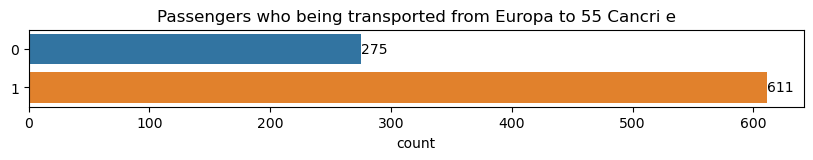

Percent: 68.96%


In [22]:
planet_dest = temp_df['Transported'].value_counts().rename_axis('Europa-55 Cancri e').reset_index(name='count')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 1))
ax1 = sns.barplot(ax=axes, data=planet_dest, x='count', y='Europa-55 Cancri e', orient='h')
ax1.bar_label(container=ax1.containers[0])
ax1.set(title='Passengers who being transported from Europa to 55 Cancri e', ylabel='')
plt.show()

percent = planet_dest['count'].loc[(planet_dest['Europa-55 Cancri e'] == 1)].sum() * 100 / planet_dest['count'].sum()
print(f'Percent: {percent:.2f}%')

### We can confirm that the number of passengers from Europe to the destination 55 Cancri e who are transported is significantly higher (68.96%)

### Let's explore VIP

In [23]:
temp_df = train_df[['VIP', 'Transported']]
temp_df.head()

,VIP,Transported
0,0.0,0
1,0.0,1
2,1.0,0
3,0.0,0
4,0.0,1


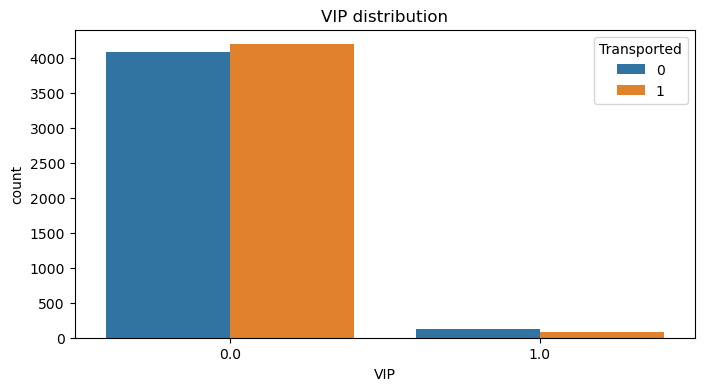

VIP and Transported

VIP Total -> 8490
1 Total -> 199
VIP = 1 and Transported = 1:
	* Total: 76 
	* 1 percent: 38.19%
	* VIP percent: 0.90%
No VIP and Transported

VIP Total -> 8490
0 Total -> 8291
VIP = 0 and Transported = 1:
	* Total: 4198 
	* 0 percent: 50.63%
	* VIP percent: 49.45%


In [24]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(8,4))
ax1 = sns.countplot(data=temp_df, x='VIP', hue='Transported')
ax1.set(title='VIP distribution')
plt.show()
compare_columns('VIP and Transported',
                temp_df['VIP'], 1,
                temp_df['Transported'], 1)
compare_columns('No VIP and Transported',
                temp_df['VIP'], 0,
                temp_df['Transported'], 1)

### So we can see than there are only 0.90% of VIPs, but they have 38.19% of being Transported

### Let's explore VIP, FoodCourt and ShoppingMall!

In [25]:
def plot_data_distribution(df, column_name, column_to_comp):
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 3))
    ax1 = sns.countplot(ax=axes[0], data=df, x=column_name)
    ax1.set(ylabel='')
    temp = df[[column_name, column_to_comp]].groupby(column_name).agg('mean').reset_index()
    temp_order = temp.sort_values(column_to_comp, ascending=False)
    ax2 = sns.barplot(ax=axes[1], data=temp, x=column_to_comp, y=column_name, order=temp_order[column_name])
    ax2.set(ylabel='')
    plt.text(x=-0.25, y=-1, s=f'{column_name} and {column_to_comp}', size='medium', color='black')
    plt.show()

In [26]:
temp_df = train_df[['FoodCourt', 'ShoppingMall', 'Transported', 'Group_Size']]
temp_df.head()

,FoodCourt,ShoppingMall,Transported,Group_Size
0,0.0,0.0,0,1
1,9.0,25.0,1,1
2,3576.0,0.0,0,2
3,1283.0,371.0,0,2
4,70.0,151.0,1,1


In [27]:
temp_df['FoodCourt'] = pd.cut(temp_df['FoodCourt'], 
                   bins=[0, 49, 99, 499, 999, int(temp_df['FoodCourt'].max())], 
                   labels=['0-49', '50-99', '100-499', '500-999', '1000-max'],
                   include_lowest=True)
temp_df['ShoppingMall'] = pd.cut(temp_df['ShoppingMall'], 
                   bins=[0, 49, 99, 499, 999, int(temp_df['ShoppingMall'].max())], 
                   labels=['0-49', '50-99', '100-499', '500-999', '1000-max'],
                   include_lowest=True)

temp_df.head()

/tmp/ipykernel_74779/388269845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['FoodCourt'] = pd.cut(temp_df['FoodCourt'],
/tmp/ipykernel_74779/388269845.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ShoppingMall'] = pd.cut(temp_df['ShoppingMall'],


,FoodCourt,ShoppingMall,Transported,Group_Size
0,0-49,0-49,0,1
1,0-49,0-49,1,1
2,1000-max,0-49,0,2
3,1000-max,100-499,0,2
4,50-99,100-499,1,1


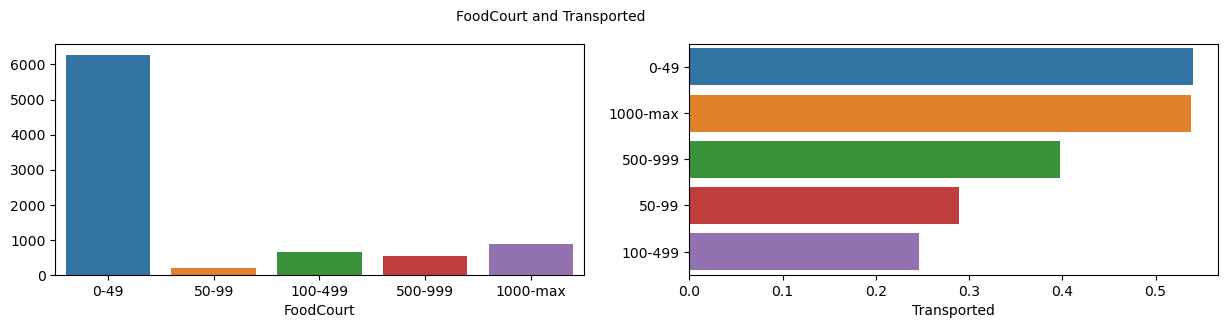

In [28]:
plot_data_distribution(temp_df, 'FoodCourt', 'Transported')

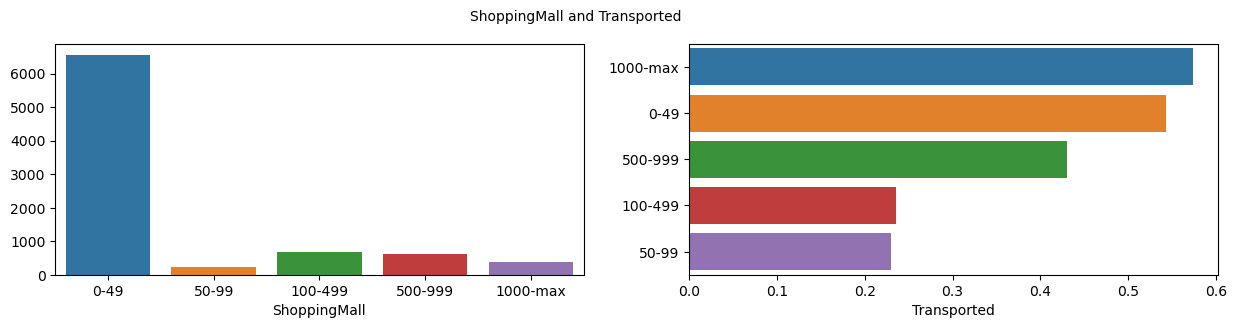

In [29]:
plot_data_distribution(temp_df, 'ShoppingMall', 'Transported')

In [30]:
train_df['CutFoodCourt'] = temp_df['FoodCourt']
train_df['CutShoppingMall'] = temp_df['ShoppingMall']
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Group_Size,CutFoodCourt,CutShoppingMall
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0001,1,0-49,0-49
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0002,1,0-49,0-49
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0003,2,1000-max,0-49
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0003,2,1000-max,100-499
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0004,1,50-99,100-499


In [31]:
temp_df = train_df[['FoodCourt', 'ShoppingMall', 'Transported', 'Group_Size']]
temp_df['FoodCourt'] = pd.cut(temp_df['FoodCourt'], 
                   bins=[0, 9, 19, 29, 39, 50],
                   labels=['0-9', '10-19', '20-29', '30-49', '40-50'],
                   include_lowest=True)
temp_df['ShoppingMall'] = pd.cut(temp_df['ShoppingMall'], 
                   bins=[0, 9, 19, 29, 39, 50],
                   labels=['0-9', '10-19', '20-29', '30-49', '40-50'],
                   include_lowest=True)

temp_df.head()

/tmp/ipykernel_74779/1837372681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['FoodCourt'] = pd.cut(temp_df['FoodCourt'],
/tmp/ipykernel_74779/1837372681.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ShoppingMall'] = pd.cut(temp_df['ShoppingMall'],


,FoodCourt,ShoppingMall,Transported,Group_Size
0,0-9,0-9,0,1
1,0-9,20-29,1,1
2,NaN,0-9,0,2
3,NaN,NaN,0,2
4,NaN,NaN,1,1


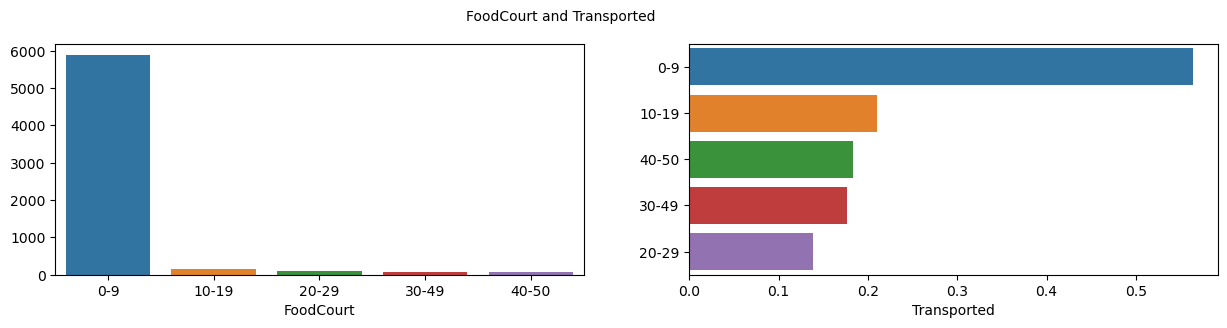

In [32]:
plot_data_distribution(temp_df, 'FoodCourt', 'Transported')

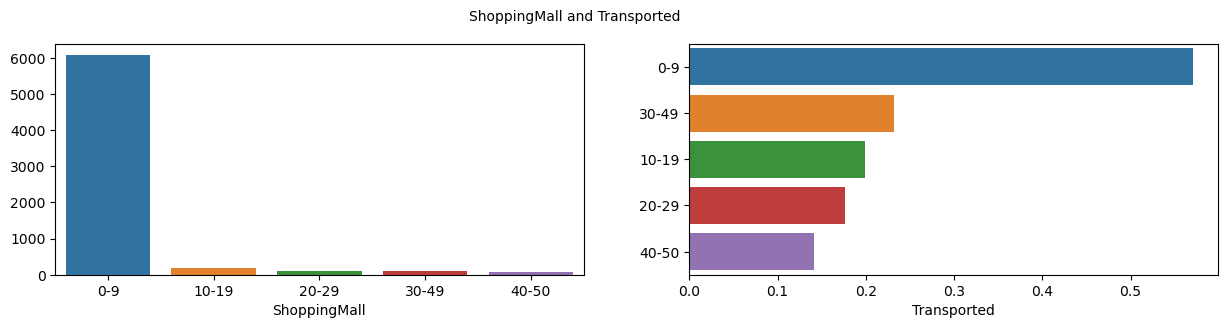

In [33]:
plot_data_distribution(temp_df, 'ShoppingMall', 'Transported')

In [34]:
temp_df = train_df[['FoodCourt', 'ShoppingMall', 'Transported', 'Group_Size']]
temp_df['FoodCourt'] = pd.cut(temp_df['FoodCourt'], 
                   bins=[1000, 2499, 5000, 7499, 10000, train_df['FoodCourt'].max()],
                   labels=['1000-2499', '2500-4999', '5000-7499', '7500-9999', '10000-max'],
                   include_lowest=True)
temp_df['ShoppingMall'] = pd.cut(temp_df['ShoppingMall'], 
                   bins=[1000, 2499, 5000, 7499, 10000, train_df['ShoppingMall'].max()],
                   labels=['1000-2499', '2500-4999', '5000-7499', '7500-9999', '10000-max'],
                   include_lowest=True)

temp_df.head()

/tmp/ipykernel_74779/3424171300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['FoodCourt'] = pd.cut(temp_df['FoodCourt'],
/tmp/ipykernel_74779/3424171300.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ShoppingMall'] = pd.cut(temp_df['ShoppingMall'],


,FoodCourt,ShoppingMall,Transported,Group_Size
0,NaN,NaN,0,1
1,NaN,NaN,1,1
2,2500-4999,NaN,0,2
3,1000-2499,NaN,0,2
4,NaN,NaN,1,1


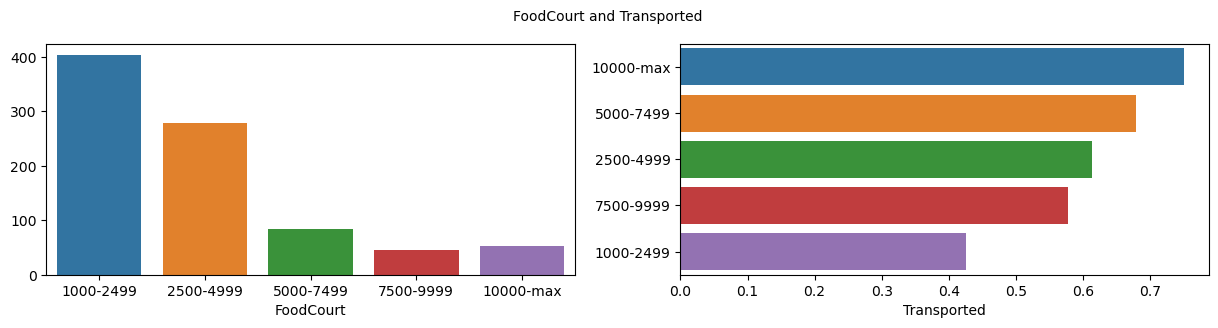

In [35]:
plot_data_distribution(temp_df, 'FoodCourt', 'Transported')

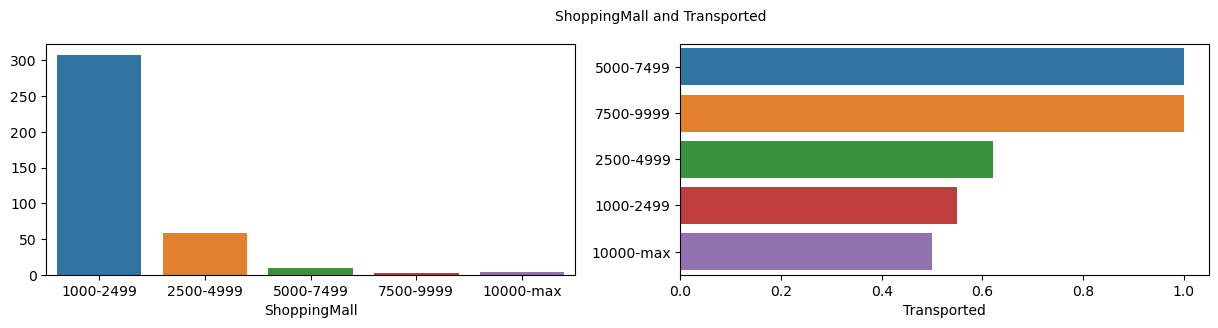

In [36]:
plot_data_distribution(temp_df, 'ShoppingMall', 'Transported')

### We can see that prevail the Passengers Transported between 0 - 10 spent in FoodCourt and ShoppingMall. And 
### between 5000 - 7500 and more than 10000 in FoodCourt, and between 5000 - 10000 in ShoppingMall

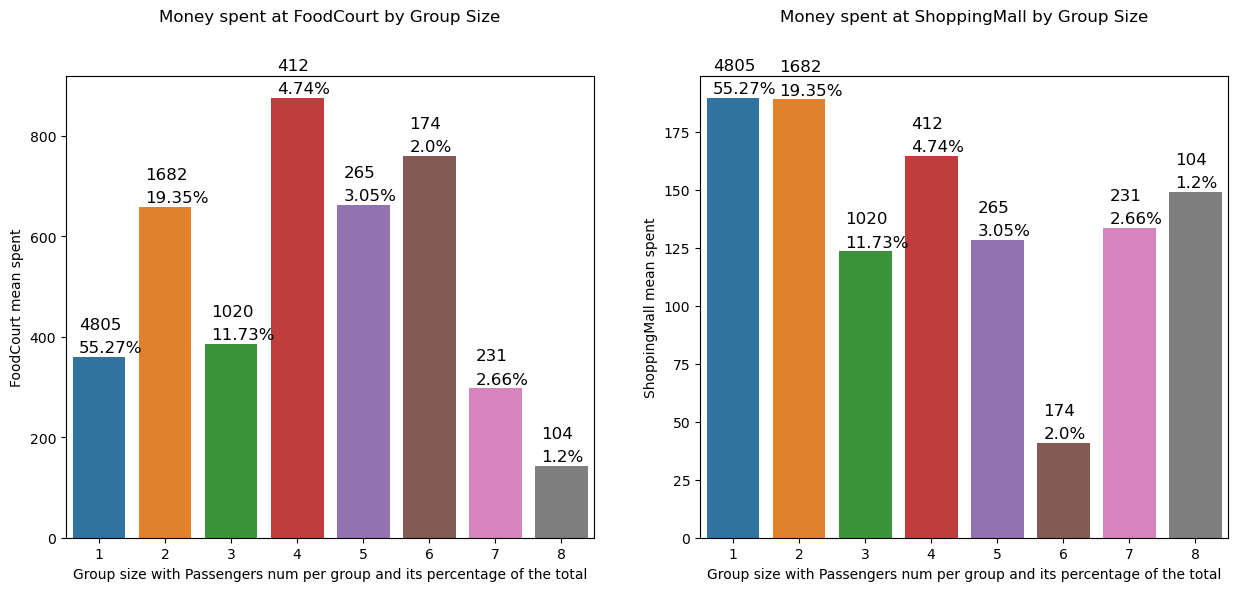

In [37]:
temp_df = train_df[['FoodCourt', 'ShoppingMall', 'Transported', 'Group_Size']]
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 6))
temp_l = ['FoodCourt', 'ShoppingMall']
for x in range(len(temp_l)):
    ax = sns.barplot(ax=axes[x], data=temp_df, y=temp_l[x], x='Group_Size', errorbar=None)
    ax.set_title(f'Money spent at {temp_l[x]} by Group Size', y=1.1)
    ax.set(ylabel=f'{temp_l[x]} mean spent',
           xlabel='Group size with Passengers num per group and its percentage of the total')
    for bar in range(len(ax.patches)):
        ax.text(x=bar-0.3,
                y=ax.patches[bar].get_height() + ax.get_ylim()[1]*0.06,
                s=temp_df['Group_Size'].value_counts()[bar+1],
                fontsize=12)
        percent = temp_df['Group_Size'].value_counts()[bar+1] * 100 / temp_df['Group_Size'].value_counts().sum()
        percent = np.around(percent, 2)
        ax.text(x=bar-0.3,
                y=ax.patches[bar].get_height() + ax.get_ylim()[1]*0.01,
                s=f'{percent}%',
                fontsize=12)
        
plt.show()

### We can see that groups 2, 4, 5 and 6 are the ones who spent more money on FoodCourt and groups 1, 2 and 4 are the ones who spent more on ShoppingMall

In [38]:
cabin_deck = train_df['Cabin'].str.split('/', expand=True)[0]
cabin_num = train_df['Cabin'].str.split('/', expand=True)[1]
cabin_side = train_df['Cabin'].str.split('/', expand=True)[2]
temp_df = pd.DataFrame({'cabin_deck': cabin_deck, 'cabin_num': cabin_num, 'cabin_side': cabin_side})
temp_df.head()

,cabin_deck,cabin_num,cabin_side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


In [39]:
print(f"len cabin_deck: {len(temp_df['cabin_deck'].unique())}")
print(f"len cabin_num: {len(temp_df['cabin_num'].unique())}")
print(f"len cabin_side: {len(temp_df['cabin_side'].unique())}")

len cabin_deck: 9
len cabin_num: 1818
len cabin_side: 3


#### Drop cabin_num because the len is to big and dont contribute to much

In [40]:
temp_df = temp_df.drop('cabin_num', axis=1)
temp_df['Transported'] = train_df['Transported']
temp_df.head()

,cabin_deck,cabin_side,Transported
0,B,P,0
1,F,S,1
2,A,S,0
3,A,S,0
4,F,S,1


In [41]:
train_df['cabin_deck'] = temp_df['cabin_deck']
train_df['cabin_side'] = temp_df['cabin_side']
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Group_Size,CutFoodCourt,CutShoppingMall,cabin_deck,cabin_side
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0001,1,0-49,0-49,B,P
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0002,1,0-49,0-49,F,S
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0003,2,1000-max,0-49,A,S
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0003,2,1000-max,100-499,A,S
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0004,1,50-99,100-499,F,S


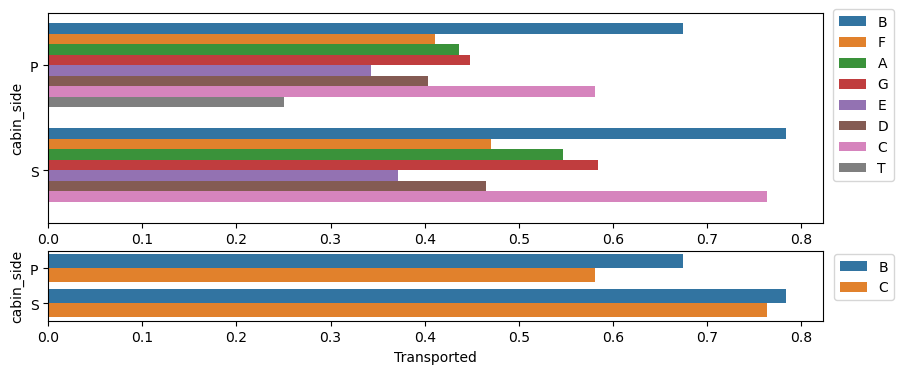

In [42]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(10,4), sharey=True, gridspec_kw={'height_ratios': [3,1]})
ax1 = sns.barplot(ax=axes[0], data=temp_df, x='Transported', y='cabin_side', hue='cabin_deck', orient='h', errorbar=None)
ax1.legend(bbox_to_anchor=(1.1, 1.05))

# Take off Cabin B and C, who has the most probabilities to being Transported
temp_df = temp_df.loc[(temp_df['cabin_deck'] == 'B') | (temp_df['cabin_deck'] == 'C')]
ax2 = sns.barplot(ax=axes[1], data=temp_df, x='Transported', y='cabin_side', hue='cabin_deck', orient='h', errorbar=None)
ax2.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [43]:
compare_columns('Cabin B and Transported',
                temp_df['cabin_deck'], 'B',
                temp_df['Transported'], 1)

compare_columns('Cabin C and Transported',
                temp_df['cabin_deck'], 'C',
                temp_df['Transported'], 1)

Cabin B and Transported

cabin_deck Total -> 1526
B Total -> 779
cabin_deck = B and Transported = 1:
	* Total: 572 
	* B percent: 73.43%
	* cabin_deck percent: 37.48%
Cabin C and Transported

cabin_deck Total -> 1526
C Total -> 747
cabin_deck = C and Transported = 1:
	* Total: 508 
	* C percent: 68.01%
	* cabin_deck percent: 33.29%


In [44]:
# Probability of goes in Cabin B or C and being Transported
cabin_BC = temp_df['Transported'].value_counts().rename_axis('cabin_BC').reset_index(name='count')
percent = cabin_BC['count'].loc[(cabin_BC['cabin_BC'] == 1)].sum() * 100 / cabin_BC['count'].sum()
print(f"percent of goes in Cabin B or C and being Transported {percent:.2f}%")

percent of goes in Cabin B or C and being Transported 70.77%


### So we can see if the Passenger goes in the Cabin B or C, has 70.77% of posibilities of being Transported

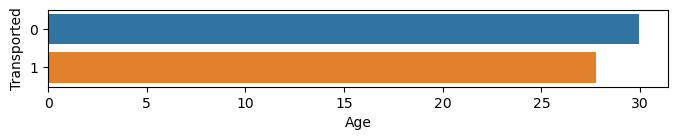

In [45]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 1))
ax1 = sns.barplot(data=train_df, x='Age', y='Transported', orient='h', errorbar=None)
plt.show()

In [46]:
temp_df = train_df[['Age', 'Transported']]
temp_df.head()

,Age,Transported
0,39.0,0
1,24.0,1
2,58.0,0
3,33.0,0
4,16.0,1


In [47]:
temp_df['Age'] = pd.cut(temp_df['Age'],
                bins=[0, 15, 30, 45, 60, temp_df['Age'].max()],
                labels=['0-15', '15-30', '30-45', '45-60', '60-max'],
                include_lowest=True)
temp_df.head()

/tmp/ipykernel_74779/1383751495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Age'] = pd.cut(temp_df['Age'],


,Age,Transported
0,30-45,0
1,15-30,1
2,45-60,0
3,30-45,0
4,15-30,1


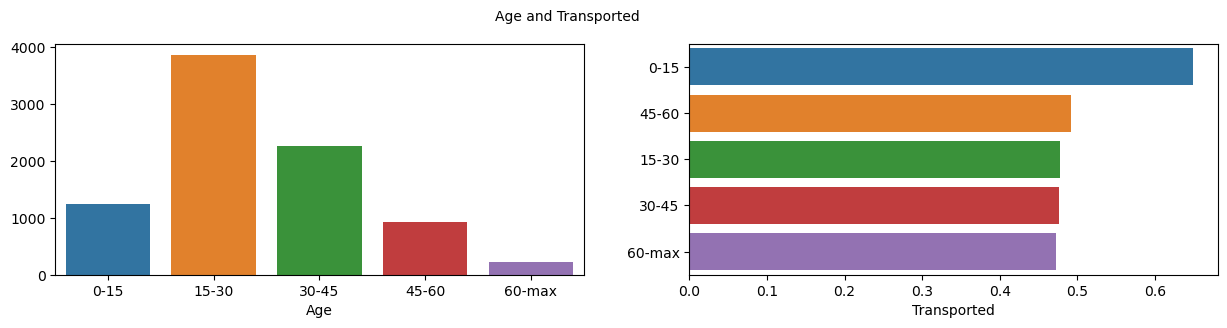

In [48]:
plot_data_distribution(temp_df, 'Age', 'Transported')

In [49]:
compare_columns('15-30 Age vs Transported', temp_df['Age'], '15-30', temp_df['Transported'], 1)
compare_columns('15-30 Age vs Transported', temp_df['Age'], '0-15', temp_df['Transported'], 1)

15-30 Age vs Transported

Age Total -> 8514
15-30 Total -> 3863
Age = 15-30 and Transported = 1:
	* Total: 1845 
	* 15-30 percent: 47.76%
	* Age percent: 21.67%
15-30 Age vs Transported

Age Total -> 8514
0-15 Total -> 1240
Age = 0-15 and Transported = 1:
	* Total: 804 
	* 0-15 percent: 64.84%
	* Age percent: 9.44%


### Passengers between 0-15 have 64.84% possibilities of being Transported, but constitute the 9.44% percent of total

In [50]:
temp_df = train_df[['Spa', 'Transported', 'Group_Size']]
temp_df.head()

,Spa,Transported,Group_Size
0,0.0,0,1
1,549.0,1,1
2,6715.0,0,2
3,3329.0,0,2
4,565.0,1,1


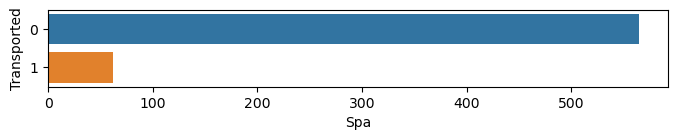

In [51]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(8, 1))
ax1 = sns.barplot(data=temp_df, x='Spa', y='Transported', errorbar=None, orient='h')
plt.show()

In [52]:
temp_df['Spa'] = pd.cut(x=temp_df['Spa'],
                        bins=[0, 10, 100, 200, temp_df['Spa'].max()],
                        labels=['0-10', '10-100', '100-200', '200-max'],
                        include_lowest=True)
temp_df.head()

/tmp/ipykernel_74779/1205001117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Spa'] = pd.cut(x=temp_df['Spa'],


,Spa,Transported,Group_Size
0,0-10,0,1
1,200-max,1,1
2,200-max,0,2
3,200-max,0,2
4,200-max,1,1


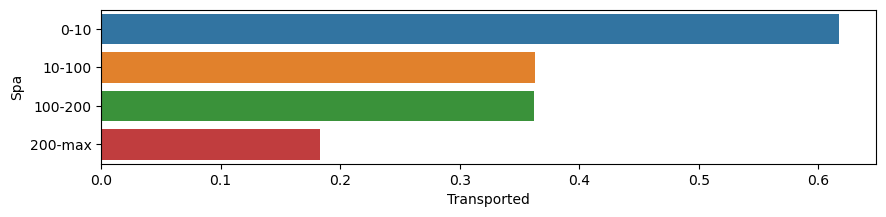

In [53]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(10, 2))
ax1 = sns.barplot(data=temp_df, y='Spa', x='Transported', errorbar=None, orient='h')

### Passengers who spent between 0 - 10 on Spa, have more than 60% of possibilities of being Transported

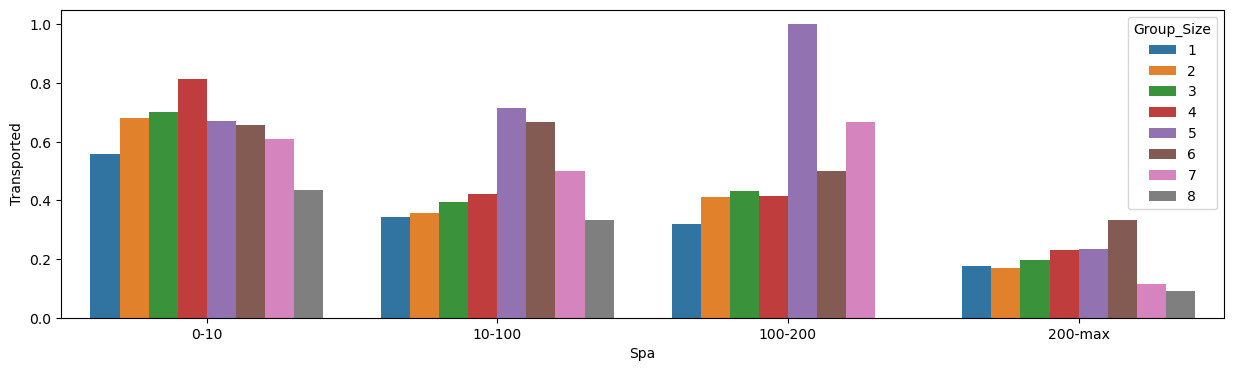

In [54]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15, 4))
ax2 = sns.barplot(data=temp_df, x='Spa', y='Transported', hue='Group_Size', errorbar=None, orient='v')
plt.show()

### Aswell Passengers who spent less than 10 have more chances, and Passengers in group 5 who spent between 100 - 200 are going to be Transported

# ---------------------------------------------------------------------------------------------------------------------------------------

## Until now, we can see that this are the best features correlations for being Transported:
* Passengers CryoSleep have +80%
* Passengers who spent low money on RoomService, Spa or VRDeck
* Passengers in groups 2 to 7 have more than 50%
* Passengers in groups 3 to 6 have almost more than 60%
* Passengers who spent between 0-10, 5000-7500 and more than 10000 have a lot of possibilities
* Passengers who spent between 0-10 and 5000-10000 have a lot of possibilites
    * And between this spent of money, groups 2, 4, 5 and 6 are the ones who spent more on FoodCourt
    * And groups 1, 2 and 4 are the ones who spent more on ShoppingMall
* Passengers from Europe and destination 55 Cancri e have 68.96%
* Passengers who go in Cabin B or C have 70.77%
* Passengers between 0-15 have 64.84%
* Passengers who spent less than 10 in Spa
    * Passengers in group 5 who spent between 100 and 200 

# Data exploration finished
# ---------------------------------------------------------------------------------------------------------------------------------------

# Modeling

### Let's start with a simple model, to serve as a reference

In [55]:
# Modules and metrics functions
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
# Evaluate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
def evaluate_preds(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    metric_dict = {'accuracy': round(accuracy, 6),
                  'precision': round(precision, 6),
                  'recall': round(recall, 6),
                  'f1': round(f1, 6)}
#     print(f'Acc: {accuracy * 100:.2f}%')
#     print(f'Precision: {precision:.2f}')
#     print(f'Recall: {recall:.2f}')
#     print(f'F1: {f1:.2f}')
    return metric_dict


In [56]:
display(train_df.head(), test_df.head())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Group_Size,CutFoodCourt,CutShoppingMall,cabin_deck,cabin_side
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0001,1,0-49,0-49,B,P
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0002,1,0-49,0-49,F,S
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0003,2,1000-max,0-49,A,S
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0003,2,1000-max,100-499,A,S
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0004,1,50-99,100-499,F,S


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Group_Size
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,1


In [57]:
train_df['Group'] = pd.to_numeric(train_df['Group'])

In [58]:
# Create a dict for all the models metrics
models_scores = {}

In [59]:
# Pipeline
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = train_df.drop(['PassengerId', 'Cabin', 'Name', 'Transported', 'CutFoodCourt', 'CutShoppingMall'], axis=1)
y = train_df['Transported']

categorical_features = ['HomePlanet', 'Destination', 'cabin_deck', 'cabin_side']
number_features = ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group', 'Group_Size']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
number_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', number_transformer, number_features)
    ]
)

rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfc', RandomForestClassifier())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Simple test with diferents models

In [58]:
# Trying diferents models

# Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


models = [RandomForestClassifier(),
          LinearDiscriminantAnalysis(),
          KNeighborsClassifier(),
          GaussianNB(),
          DecisionTreeClassifier(),
          SVC(),
          LogisticRegression()]

for x in range(len(models)):
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        (f'{models[x]}', models[x])
    ])
    print(f'Training.....{models[x]}')
    model.fit(X_train, y_train)
    models_scores[f'model{x}'] = {'name': f'{models[x]}', 'note': 'simple test', 'score': model.score(X_test, y_test),
                               'metrics': evaluate_preds(y_test, model.predict(X_test))}
    print('.....Finish')

Training.....RandomForestClassifier()
.....Finish
Training.....LinearDiscriminantAnalysis()
.....Finish
Training.....KNeighborsClassifier()
.....Finish
Training.....GaussianNB()
.....Finish
Training.....DecisionTreeClassifier()
.....Finish
Training.....SVC()
.....Finish
Training.....LogisticRegression()
.....Finish


/home/manu/Proyectos/data-science/Spaceship-Titanic/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


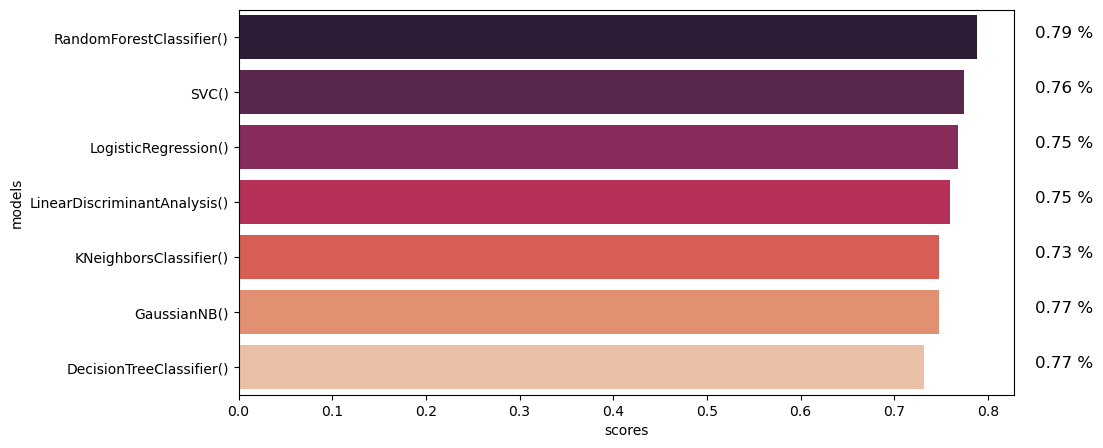

In [59]:
# Scores and comparation
name_models = []
score_models = []
for key,val in models_scores.items():
    name_models.append(val['name'])
    score_models.append(val['score'])
    
temp_df = pd.DataFrame({'models': name_models, 'scores': score_models})
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(10,5))
ax1 = sns.barplot(data=temp_df.sort_values(by='scores', ascending=False), y='models', x='scores', orient='h', errorbar=None, palette='rocket')
for bar in range(len(ax1.patches)):
    ax1.text(x=0.85,
            y=bar,
            s=f"{temp_df['scores'].iloc[bar]:.2f} %",
            fontsize=12)
plt.show()



### We can see that RandomForestClasiffier and LogisiticRegression are the best

In [60]:
# rfc_simple
print(f'Training.....{RandomForestClassifier()}')
rfc.fit(X_train, y_train)
models_scores['simple_rfc'] = {'name': 'rfc_simple', 'note': 'simple test', 'score': rfc.score(X_test, y_test),
                           'metrics': evaluate_preds(y_test, rfc.predict(X_test))}
print('.....Finish')
print(models_scores['simple_rfc'])

Training.....RandomForestClassifier()
.....Finish
{'name': 'rfc_simple', 'note': 'simple test', 'score': 0.7860839562967222, 'metrics': {'accuracy': 0.786084, 'precision': 0.805556, 'recall': 0.759681, 'f1': 0.781946}}


In [61]:
# rfc_grid1
rfc_grid1 = {
    'preprocessor__cat__imputer__strategy': ['constant', 'most_frequent'],
    'preprocessor__num__imputer__strategy': ['mean', 'most_frequent'],
    'rfc__n_estimators': [100, 1000],
    'rfc__max_depth': [None, 5],
    'rfc__max_features': ['sqrt'],
    'rfc__min_samples_split': [2, 4]
}
gs_rfc1 = GridSearchCV(rfc, rfc_grid1, cv=5, verbose=1)
print(f'Training.....{RandomForestClassifier()}')
gs_rfc1.fit(X_train, y_train)
models_scores['gs1_rfc'] = {'name': 'gs_rfc1', 'note': 'rfc with GridSearch try 1', 'score': gs_rfc1.score(X_test, y_test),
                           'metrics': evaluate_preds(y_test, gs_rfc1.predict(X_test)),
                           'best_params': gs_rfc1.best_params_}
print('.....Finish')
print(models_scores['gs1_rfc'])

Training.....RandomForestClassifier()
Fitting 5 folds for each of 32 candidates, totalling 160 fits
.....Finish
{'name': 'gs_rfc1', 'note': 'rfc with GridSearch try 1', 'score': 0.7889591719378953, 'metrics': {'accuracy': 0.788959, 'precision': 0.805257, 'recall': 0.767654, 'f1': 0.786006}, 'best_params': {'preprocessor__cat__imputer__strategy': 'constant', 'preprocessor__num__imputer__strategy': 'mean', 'rfc__max_depth': None, 'rfc__max_features': 'sqrt', 'rfc__min_samples_split': 2, 'rfc__n_estimators': 1000}}


In [62]:
gs_rfc1.best_estimator_[:-1].get_feature_names_out()

array(['cat__HomePlanet_Earth', 'cat__HomePlanet_Europa',
       'cat__HomePlanet_Mars', 'cat__HomePlanet_missing',
       'cat__Destination_55 Cancri e', 'cat__Destination_PSO J318.5-22',
       'cat__Destination_TRAPPIST-1e', 'cat__Destination_missing',
       'cat__cabin_deck_A', 'cat__cabin_deck_B', 'cat__cabin_deck_C',
       'cat__cabin_deck_D', 'cat__cabin_deck_E', 'cat__cabin_deck_F',
       'cat__cabin_deck_G', 'cat__cabin_deck_T',
       'cat__cabin_deck_missing', 'cat__cabin_side_P',
       'cat__cabin_side_S', 'cat__cabin_side_missing', 'num__CryoSleep',
       'num__Age', 'num__VIP', 'num__RoomService', 'num__FoodCourt',
       'num__ShoppingMall', 'num__Spa', 'num__VRDeck', 'num__Group',
       'num__Group_Size'], dtype=object)

In [63]:
gs_rfc1.best_estimator_[-1].feature_importances_

array([2.28558701e-02, 1.61910803e-02, 9.27271304e-03, 3.08321409e-03,
       9.72439105e-03, 6.80399953e-03, 1.11158440e-02, 2.49247787e-03,
       1.99899574e-03, 5.40197224e-03, 6.11948959e-03, 3.05137030e-03,
       1.31542312e-02, 1.32112706e-02, 1.24206737e-02, 5.83109761e-05,
       1.54250356e-03, 1.15695613e-02, 1.18912601e-02, 1.60024780e-03,
       9.61974540e-02, 1.13982618e-01, 6.60392740e-03, 9.35447745e-02,
       7.90451138e-02, 6.89703315e-02, 1.05754560e-01, 9.00799993e-02,
       1.43356811e-01, 3.89049326e-02])

In [64]:
feature_importances = [gs_rfc1.best_estimator_[:-1].get_feature_names_out(), gs_rfc1.best_estimator_[-1].feature_importances_]
feature_importances

[array(['cat__HomePlanet_Earth', 'cat__HomePlanet_Europa',
        'cat__HomePlanet_Mars', 'cat__HomePlanet_missing',
        'cat__Destination_55 Cancri e', 'cat__Destination_PSO J318.5-22',
        'cat__Destination_TRAPPIST-1e', 'cat__Destination_missing',
        'cat__cabin_deck_A', 'cat__cabin_deck_B', 'cat__cabin_deck_C',
        'cat__cabin_deck_D', 'cat__cabin_deck_E', 'cat__cabin_deck_F',
        'cat__cabin_deck_G', 'cat__cabin_deck_T',
        'cat__cabin_deck_missing', 'cat__cabin_side_P',
        'cat__cabin_side_S', 'cat__cabin_side_missing', 'num__CryoSleep',
        'num__Age', 'num__VIP', 'num__RoomService', 'num__FoodCourt',
        'num__ShoppingMall', 'num__Spa', 'num__VRDeck', 'num__Group',
        'num__Group_Size'], dtype=object),
 array([2.28558701e-02, 1.61910803e-02, 9.27271304e-03, 3.08321409e-03,
        9.72439105e-03, 6.80399953e-03, 1.11158440e-02, 2.49247787e-03,
        1.99899574e-03, 5.40197224e-03, 6.11948959e-03, 3.05137030e-03,
        1.31542312e

In [65]:
feature_importances_df = pd.DataFrame(data=[feature_importances[1]], columns=feature_importances[0])
feature_importances_df

,cat__HomePlanet_Earth,cat__HomePlanet_Europa,cat__HomePlanet_Mars,cat__HomePlanet_missing,cat__Destination_55 Cancri e,cat__Destination_PSO J318.5-22,cat__Destination_TRAPPIST-1e,cat__Destination_missing,cat__cabin_deck_A,cat__cabin_deck_B,...,num__CryoSleep,num__Age,num__VIP,num__RoomService,num__FoodCourt,num__ShoppingMall,num__Spa,num__VRDeck,num__Group,num__Group_Size
0,0.022856,0.016191,0.009273,0.003083,0.009724,0.006804,0.011116,0.002492,0.001999,0.005402,...,0.096197,0.113983,0.006604,0.093545,0.079045,0.06897,0.105755,0.09008,0.143357,0.038905


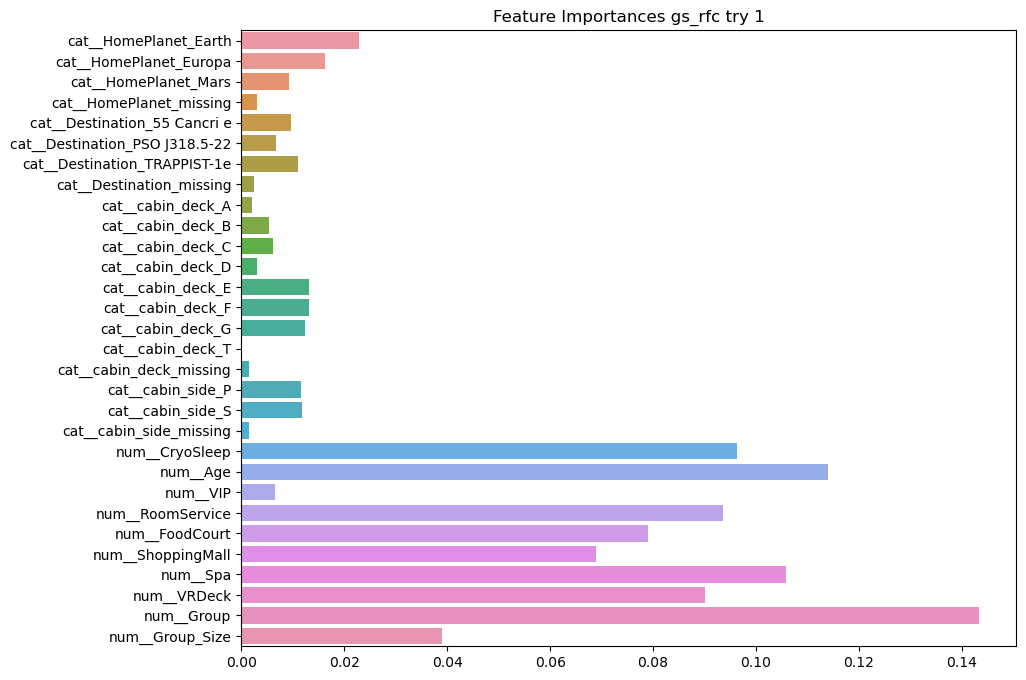

In [66]:
# feature_importances plot
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(10,8))
ax1 = sns.barplot(feature_importances_df, orient='h')
ax1.set(title='Feature Importances gs_rfc try 1')
plt.show()

In [67]:
# rfc_grid2
rfc_grid2 = {
    'preprocessor__cat__imputer__strategy': ['constant'],
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'rfc__n_estimators': [1000, 2000, 5000],
    'rfc__max_depth': [None],
    'rfc__max_features': ['sqrt'],
    'rfc__min_samples_split': [1, 2]
}
gs_rfc2 = GridSearchCV(rfc, rfc_grid2, cv=5, verbose=1)
print(f'Training.....{RandomForestClassifier()}')
gs_rfc2.fit(X_train, y_train)
models_scores['gs2_rfc'] = {'name': 'gs_rfc2', 'note': 'rfc with GridSearch 2 try', 'score': gs_rfc2.score(X_test, y_test),
                           'metrics': evaluate_preds(y_test, gs_rfc2.predict(X_test)),
                           'best_params': gs_rfc2.best_params_}
print('.....Finish')
print(models_scores['gs2_rfc'])

Training.....RandomForestClassifier()
Fitting 5 folds for each of 12 candidates, totalling 60 fits
.....Finish
{'name': 'gs_rfc2', 'note': 'rfc with GridSearch 2 try', 'score': 0.7872340425531915, 'metrics': {'accuracy': 0.787234, 'precision': 0.803103, 'recall': 0.766515, 'f1': 0.784382}, 'best_params': {'preprocessor__cat__imputer__strategy': 'constant', 'preprocessor__num__imputer__strategy': 'mean', 'rfc__max_depth': None, 'rfc__max_features': 'sqrt', 'rfc__min_samples_split': 1, 'rfc__n_estimators': 5000}}


In [68]:
gs_rfc2.best_estimator_[-1].feature_importances_

array([2.19306855e-02, 1.61591326e-02, 9.57583641e-03, 3.09600497e-03,
       9.67439783e-03, 6.68596760e-03, 1.10858822e-02, 2.51779113e-03,
       2.02067096e-03, 5.43638820e-03, 6.26140132e-03, 3.03068283e-03,
       1.31729017e-02, 1.35009952e-02, 1.26399513e-02, 4.55043483e-05,
       1.57442041e-03, 1.15522069e-02, 1.18161702e-02, 1.52391540e-03,
       9.44736288e-02, 1.13954947e-01, 6.60576483e-03, 9.52584392e-02,
       7.92716898e-02, 6.96806946e-02, 1.04420076e-01, 9.07202279e-02,
       1.43309729e-01, 3.90038959e-02])

In [69]:
# Append the new feature_importances to the df
feature_importances_df.loc[len(feature_importances_df)] = gs_rfc2.best_estimator_[-1].feature_importances_
feature_importances_df

,cat__HomePlanet_Earth,cat__HomePlanet_Europa,cat__HomePlanet_Mars,cat__HomePlanet_missing,cat__Destination_55 Cancri e,cat__Destination_PSO J318.5-22,cat__Destination_TRAPPIST-1e,cat__Destination_missing,cat__cabin_deck_A,cat__cabin_deck_B,...,num__CryoSleep,num__Age,num__VIP,num__RoomService,num__FoodCourt,num__ShoppingMall,num__Spa,num__VRDeck,num__Group,num__Group_Size
0,0.022856,0.016191,0.009273,0.003083,0.009724,0.006804,0.011116,0.002492,0.001999,0.005402,...,0.096197,0.113983,0.006604,0.093545,0.079045,0.068970,0.105755,0.09008,0.143357,0.038905
1,0.021931,0.016159,0.009576,0.003096,0.009674,0.006686,0.011086,0.002518,0.002021,0.005436,...,0.094474,0.113955,0.006606,0.095258,0.079272,0.069681,0.104420,0.09072,0.143310,0.039004


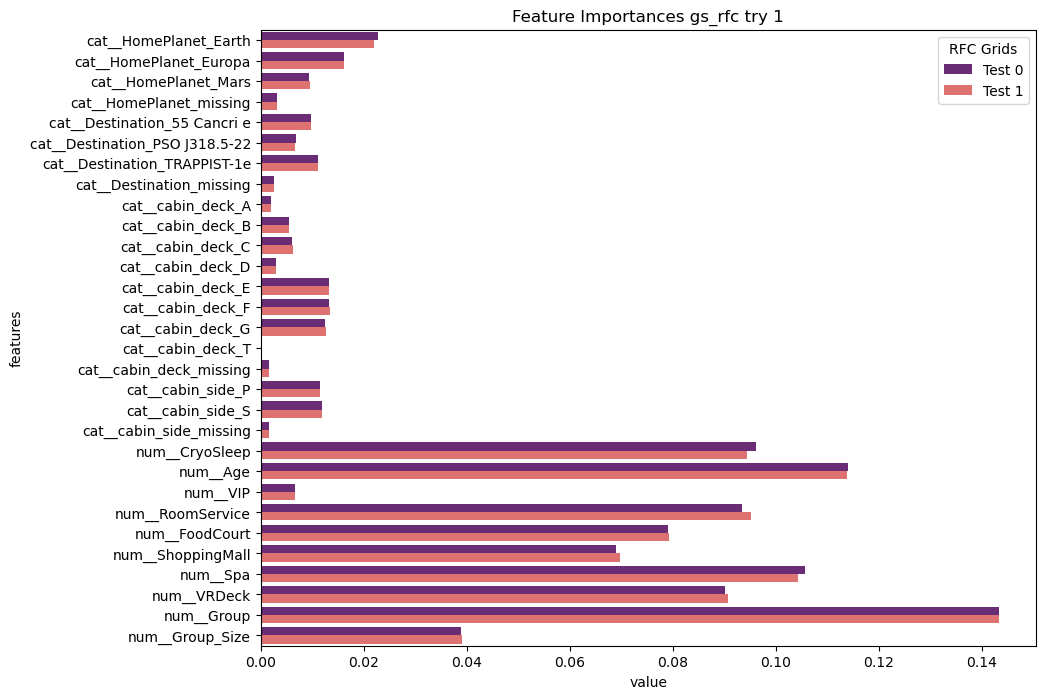

In [70]:
# feature_importances RFC grids diferences plot
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(10,8))
ax1 = sns.barplot(data=pd.melt(feature_importances_df.reset_index(), id_vars='index'), y='variable', x='value', orient='h', hue='index', palette='magma')
ax1.set(title='Feature Importances gs_rfc try 1', ylabel='features')
handles, _ = ax1.get_legend_handles_labels()
ax1.legend(handles, ['Test 0', 'Test 1'], loc="best", title='RFC Grids')
plt.show()

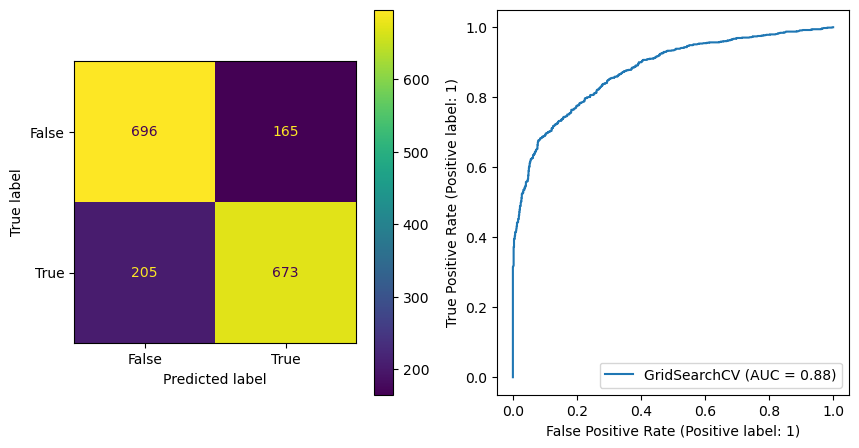

In [71]:
# Confusion Matrix and RocCurve
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
matrix = confusion_matrix(y_test, gs_rfc2.predict(X_test))
display = ConfusionMatrixDisplay(matrix,
                                display_labels=['False', 'True'])
display.plot(ax=axes[0], xticks_rotation='horizontal')
RocCurveDisplay.from_estimator(ax=axes[1], estimator=gs_rfc2, X=X_test, y=y_test)
plt.show()

## Let's try CatBoost!!!

In [60]:
# CatBoost imports
from catboost import CatBoostClassifier, Pool

In [62]:
# CatBoost simple
X2 = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)
cat_features = np.where(X.dtypes != float)[0]
pool = Pool(X_train,
            y_train)

print(f'Training.....{CatBoostClassifier()}')
catb_clf = CatBoostClassifier()
catb_clf.fit(pool, verbose=0)
models_scores['catb_simple'] = {'name': 'CatBoost', 'note': 'CatBoost simple', 'score': catb_clf.score(X_test, y_test),
                           'metrics': evaluate_preds(y_test, catb_clf.predict(X_test)),
                           'best_params': catb_clf.get_all_params()}
print('.....Finish')
print(models_scores['catb_simple'])

Training.....<catboost.core.CatBoostClassifier object at 0x7f9c180f9ae0>
.....Finish
{'name': 'CatBoost', 'note': 'CatBoost simple', 'score': 0.816561242093157, 'metrics': {'accuracy': 0.816561, 'precision': 0.820359, 'recall': 0.802108, 'f1': 0.811131}, 'best_params': {'nan_mode': 'Min', 'eval_metric': 'Logloss', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'eval_fraction': 0, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'subsample': 0.800000011920929, 'use_best_model': False, 'class_names': [0, 1], 'random_seed': 0, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'classes_count': 0, 'auto_class_w

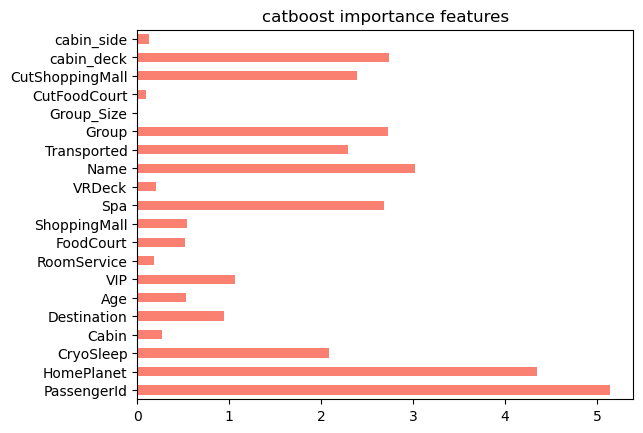

In [63]:
# feature importances barplot
cat_dict = dict(zip(train_df.columns, list(catb_clf.feature_importances_)))
cat_df = pd.DataFrame(cat_dict, index=[0])
cat_df.T.plot.barh(title='catboost importance features', color='salmon', legend=None);

In [69]:
# Catboost GridSearch
cat_grid = {
    'iterations': [100, 150, 1000],
    'learning_rate': [0.09, 0.1, 0.2],
    'max_depth': [5, 6, 7],
    'min_data_in_leaf': [0.1, 0.2, 0.3],
     'l2_leaf_reg': [2, 3.2, 3.5]
}

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

train_pool_gs = Pool(X_train,
                     y_train)

catb_gs = CatBoostClassifier(custom_loss='Accuracy', loss_function='Logloss', logging_level='Silent')

print(f'Training.....{CatBoostClassifier()}')
cat_grs = catb_gs.grid_search(cat_grid,
                           X=train_pool_gs,
                           cv=5,
                           train_size=0.2,
                           verbose=0)

models_scores['catb_grid1'] = {'name': 'CatBoost', 'note': 'CatBoost with GridSearch test 1', 'score': catb_gs.score(X_test, y_test),
                           'metrics': evaluate_preds(y_test, catb_gs.predict(X_test)),
                           'best_params': catb_gs.get_params()}
print('.....Finish')
print(models_scores['catb_grid1'])

Training.....<catboost.core.CatBoostClassifier object at 0x7f9c1c612c20>
.....Finish
{'name': 'CatBoost', 'note': 'CatBoost with GridSearch test 1', 'score': 0.7975848188614146, 'metrics': {'accuracy': 0.797585, 'precision': 0.80791, 'recall': 0.797101, 'f1': 0.802469}, 'best_params': {'loss_function': 'Logloss', 'logging_level': 'Silent', 'custom_loss': 'Accuracy', 'depth': 6, 'iterations': 150, 'min_data_in_leaf': 0.1, 'learning_rate': 0.09, 'l2_leaf_reg': 3.2}}


In [66]:
catb_gs.get_feature_importance()

array([6.64889425e+00, 5.33196591e+00, 2.14988937e+00, 1.86963636e-01,
       1.03382699e+00, 3.17394958e-01, 1.50575642e+00, 0.00000000e+00,
       1.57649220e-01, 8.79083672e-01, 2.09181569e+00, 9.64889205e-02,
       3.72154730e+00, 1.11851222e+00, 2.61675681e+00, 2.47542475e-04,
       3.19479038e-02, 1.82967357e+00, 3.40237602e+00, 8.82907025e-02,
       9.82700197e+00, 3.09663102e+00, 7.55247340e-02, 9.27742365e+00,
       6.97204892e+00, 2.68432749e+00, 1.35340035e+01, 1.31230660e+01,
       7.17490742e+00, 1.02598419e+00])

In [ ]:
# feature importance between RFC and CatBoost
feature_importances_df = feature_importances_df.drop(index=0)
feature_importances_df = feature_importances_df.drop(index=1)
feature_importances_df.loc[len(feature_importances_df)] = gs_rfc2.best_estimator_[-1].feature_importances_*100
feature_importances_df.loc[len(feature_importances_df)] = catb_gs.get_feature_importance()
feature_importances_df

NameError: name 'feature_importances_df' is not defined

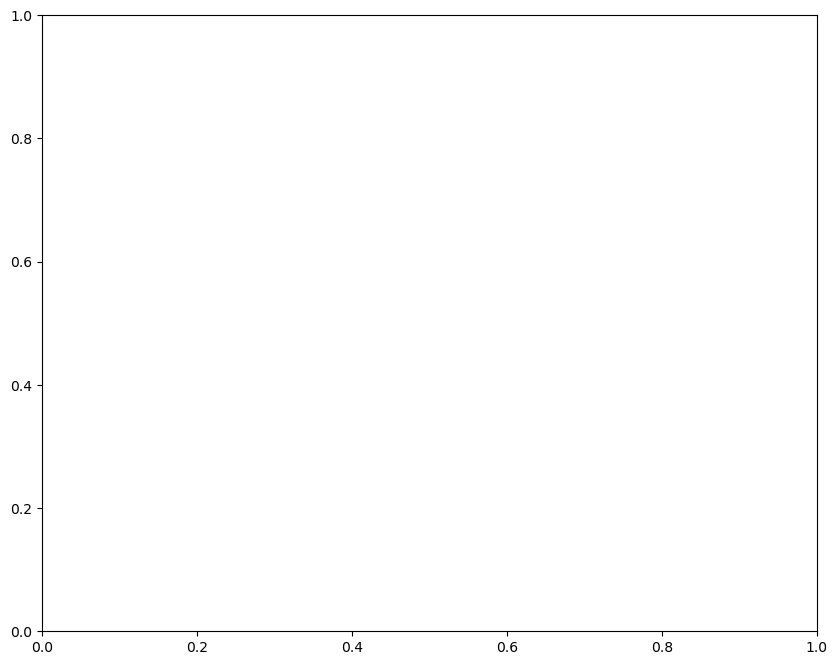

In [67]:
# feature importance plot
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,8))
ax1 = sns.barplot(data=pd.melt(feature_importances_df.reset_index(), id_vars='index'), y='variable', x='value', hue='index', orient='h')
handles, _ = ax1.get_legend_handles_labels()
ax1.legend(handles, ['RFC', 'CatBoost'], loc="best")
plt.show()

# ---------------------------------------------------------------------------------------------------------------------------------------
# Save model

In [115]:
import pickle

pickle.dump(catb_gs, open('CatB_GS simple.pk1', 'wb'))

# ---------------------------------------------------------------------------------------------------------------------------------------
# Load model

In [116]:
load_catb_gs = pickle.load(open('CatB_GS simple.pk1', 'rb'))

# Pushing result to Kaggle

In [77]:
sub_test = pd.read_csv('test.csv')
sub_sample = pd.read_csv('sample_submission.csv')
sub_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [82]:
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Group_Size,cabin_deck,cabin_side
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,B,P
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,2,1,F,S
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,3,2,A,S
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,3,2,A,S
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,4,1,F,S


In [83]:
# Data changes for predictions
sub_test[["Group", "Group_Size"]] = sub_test["PassengerId"].str.split('_', expand=True)
sub_test["Group_Size"] = sub_test["Group"].map(lambda x: sub_test["Group"].value_counts(ascending=True)[x])
sub_test['Group'] = pd.to_numeric(train_df['Group'])
sub_test['cabin_deck'] = sub_test['Cabin'].str.split('/', expand=True)[0]
sub_test['cabin_side'] = sub_test['Cabin'].str.split('/', expand=True)[2]
sub_test = sub_test.drop(['Cabin', 'Name'], axis=1)
sub_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Group_Size
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,1


In [110]:
transformed_test = preprocessor.fit_transform(sub_test.drop('PassengerId', axis=1))
preds_catb_clf = catb_clf.predict(transformed_test).astype(bool)
preds_catb_clf

array([False, False,  True, ...,  True,  True,  True])

In [111]:
df_preds = pd.DataFrame({'PassengerId': sub_test['PassengerId'], 'Transported': preds_catb_clf})
display(df_preds.head(), sub_sample.head())

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [112]:
df_preds.to_csv('sub_preds_catb_clf.csv', index=False)

In [113]:
# Catb with GridSearch
transformed_test = preprocessor.fit_transform(sub_test.drop('PassengerId', axis=1))
preds_catb_gs = catb_gs.predict(transformed_test).astype(bool)
df_preds = pd.DataFrame({'PassengerId': sub_test['PassengerId'], 'Transported': preds_catb_gs})
display(df_preds.head(), sub_sample.head())
df_preds.to_csv('sub_preds_catb_gs.csv', index=False)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
